In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train['test'] = 0
test['test'] = 1
test['default'] = -1

In [5]:
df = pd.concat([train, test]).reset_index(drop=True) 

In [6]:
df

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,test
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110143,83775,31MAR2014,SCH,F,37,N,N,1,0,-1.744976,3,50,2,3,15000,4,1,N,-1,1
110144,106254,25APR2014,GRD,F,64,Y,Y,0,0,-2.293781,3,60,1,2,200000,1,4,N,-1,1
110145,81852,30MAR2014,GRD,M,31,N,N,2,0,-0.940752,1,50,1,2,60000,4,2,N,-1,1
110146,1971,07JAN2014,UGR,F,27,N,N,1,0,-1.242392,2,80,2,3,30000,1,1,N,-1,1


In [7]:
df.isnull().sum()

client_id             0
app_date              0
education           478
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
default               0
test                  0
dtype: int64

In [8]:
df

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,test
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110143,83775,31MAR2014,SCH,F,37,N,N,1,0,-1.744976,3,50,2,3,15000,4,1,N,-1,1
110144,106254,25APR2014,GRD,F,64,Y,Y,0,0,-2.293781,3,60,1,2,200000,1,4,N,-1,1
110145,81852,30MAR2014,GRD,M,31,N,N,2,0,-0.940752,1,50,1,2,60000,4,2,N,-1,1
110146,1971,07JAN2014,UGR,F,27,N,N,1,0,-1.242392,2,80,2,3,30000,1,1,N,-1,1


In [9]:
#df = df.dropna()
df.education[df.education.isna()] = df.education.mode()[0]

/tmp/ipykernel_13408/1064288376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.education[df.education.isna()] = df.education.mode()[0]


In [10]:
#df = pd.DataFrame( data = df.values , columns = df.columns)

In [11]:
bin_cols = df[['sex',\
              'car',\
              'car_type',\
              'good_work',\
              'foreign_passport']]
                
cat_cols = df[['education',\
              'home_address',\
              'work_address',\
              'sna',\
              'first_time']]

num_cols = df[['age',\
              'score_bki',\
              'decline_app_cnt',\
              'bki_request_cnt',\
              'region_rating',\
              'income']]

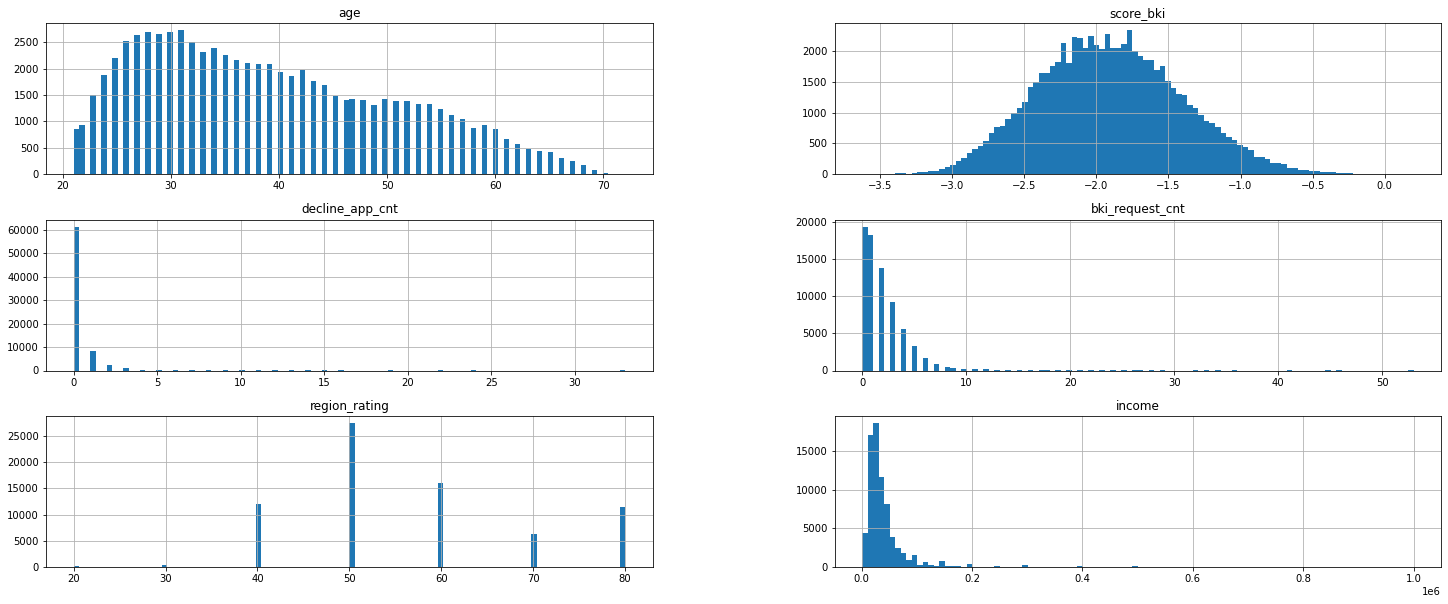

In [12]:
df[df.test == 0][num_cols.columns].hist(figsize=(25,10),bins=100);

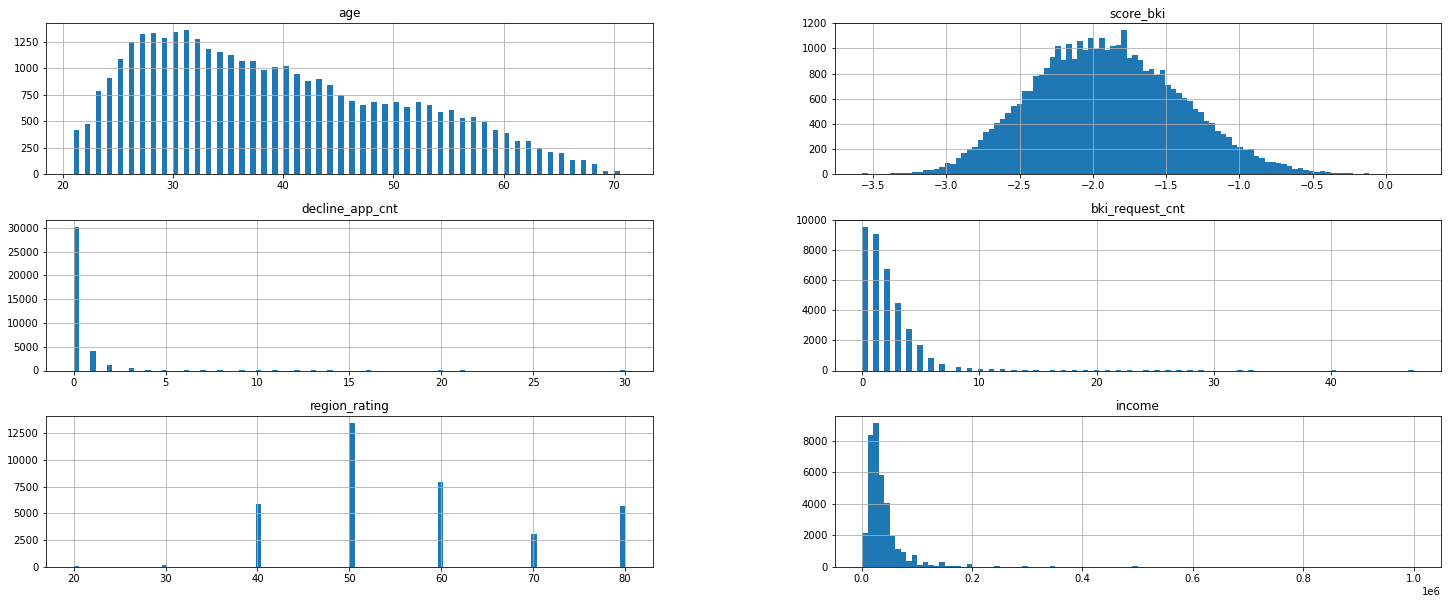

In [13]:
df[df.test == 1][num_cols.columns].hist(figsize=(25,10),bins=100);

<AxesSubplot:>

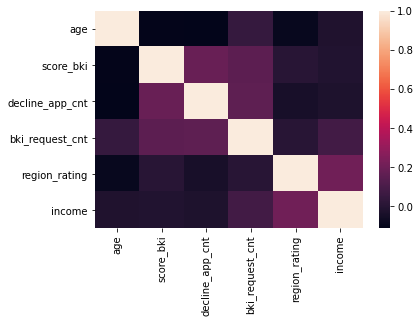

In [14]:
sns.heatmap(df[num_cols.columns].corr())

In [15]:
df[num_cols.columns]

,age,score_bki,decline_app_cnt,bki_request_cnt,region_rating,income
0,62,-2.008753,0,1,50,18000
1,59,-1.532276,0,3,50,19000
2,25,-1.408142,2,1,80,30000
3,53,-2.057471,0,2,50,10000
4,48,-1.244723,0,1,60,30000
...,...,...,...,...,...,...
110143,37,-1.744976,1,3,50,15000
110144,64,-2.293781,0,3,60,200000
110145,31,-0.940752,2,1,50,60000
110146,27,-1.242392,1,2,80,30000


In [16]:
df[num_cols.columns] = pd.DataFrame(StandardScaler().fit_transform(df[num_cols.columns]),columns=num_cols.columns)

In [17]:
df[num_cols.columns]

,age,score_bki,decline_app_cnt,bki_request_cnt,region_rating,income
0,1.975219,-0.208688,-0.341893,-0.443335,-0.516704,-0.506892
1,1.714757,0.745419,-0.341893,0.438921,-0.516704,-0.484865
2,-1.237142,0.993988,2.160936,-0.443335,1.779355,-0.242572
3,1.193834,-0.306243,-0.341893,-0.002207,-0.516704,-0.683105
4,0.759731,1.321223,-0.341893,-0.443335,0.248649,-0.242572
...,...,...,...,...,...,...
110143,-0.195295,0.319505,0.909522,0.438921,-0.516704,-0.572972
110144,2.148860,-0.779436,-0.341893,0.438921,0.248649,3.501960
110145,-0.716218,1.929901,2.160936,-0.443335,-0.516704,0.418228
110146,-1.063501,1.325890,0.909522,-0.002207,1.779355,-0.242572


In [18]:
df[num_cols.columns].describe()

,age,score_bki,decline_app_cnt,bki_request_cnt,region_rating,income
count,1.101480e+05,1.101480e+05,1.101480e+05,1.101480e+05,1.101480e+05,1.101480e+05
mean,2.589969e-16,-4.903485e-16,-1.079477e-15,6.999576e-16,-2.509444e-15,-1.840383e-16
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.584424e+00,-3.444269e+00,-3.418929e-01,-8.844627e-01,-2.812764e+00,-8.813450e-01
25%,-8.030389e-01,-7.126592e-01,-3.418929e-01,-8.844627e-01,-5.167044e-01,-4.628385e-01
50%,-1.952950e-01,-3.261521e-02,-3.418929e-01,-4.433347e-01,-5.167044e-01,-2.425719e-01
75%,7.597311e-01,6.741092e-01,-3.418929e-01,4.389213e-01,2.486488e-01,1.539080e-01
max,2.843424e+00,4.213712e+00,4.095479e+01,2.249532e+01,1.779355e+00,2.112329e+01


In [19]:
df

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,test
0,25905,01FEB2014,SCH,M,1.975219,Y,Y,-0.341893,0,-0.208688,-0.443335,-0.516704,1,2,-0.506892,4,1,N,0,0
1,63161,12MAR2014,SCH,F,1.714757,N,N,-0.341893,0,0.745419,0.438921,-0.516704,2,3,-0.484865,4,1,N,0,0
2,25887,01FEB2014,SCH,M,-1.237142,Y,N,2.160936,0,0.993988,-0.443335,1.779355,1,2,-0.242572,1,4,Y,0,0
3,16222,23JAN2014,SCH,F,1.193834,N,N,-0.341893,0,-0.306243,-0.002207,-0.516704,2,3,-0.683105,1,3,N,0,0
4,101655,18APR2014,GRD,M,0.759731,N,N,-0.341893,1,1.321223,-0.443335,0.248649,2,3,-0.242572,1,4,Y,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110143,83775,31MAR2014,SCH,F,-0.195295,N,N,0.909522,0,0.319505,0.438921,-0.516704,2,3,-0.572972,4,1,N,-1,1
110144,106254,25APR2014,GRD,F,2.148860,Y,Y,-0.341893,0,-0.779436,0.438921,0.248649,1,2,3.501960,1,4,N,-1,1
110145,81852,30MAR2014,GRD,M,-0.716218,N,N,2.160936,0,1.929901,-0.443335,-0.516704,1,2,0.418228,4,2,N,-1,1
110146,1971,07JAN2014,UGR,F,-1.063501,N,N,0.909522,0,1.325890,-0.002207,1.779355,2,3,-0.242572,1,1,N,-1,1


<AxesSubplot:>

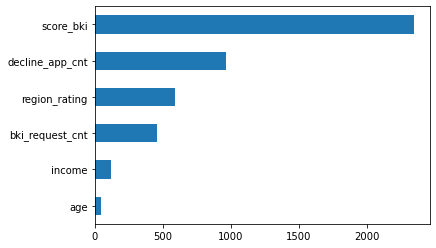

In [20]:

imp_num = pd.Series(f_classif(df[df.test==0][num_cols.columns], df[df.test==0]['default'])[0], index = num_cols.columns)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [21]:
label_encoder = LabelEncoder()

In [22]:
for i in bin_cols:
    df[i] = label_encoder.fit_transform(df[i]) 

array([[<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'car'}>],
       [<AxesSubplot:title={'center':'car_type'}>,
        <AxesSubplot:title={'center':'good_work'}>],
       [<AxesSubplot:title={'center':'foreign_passport'}>,
        <AxesSubplot:>]], dtype=object)

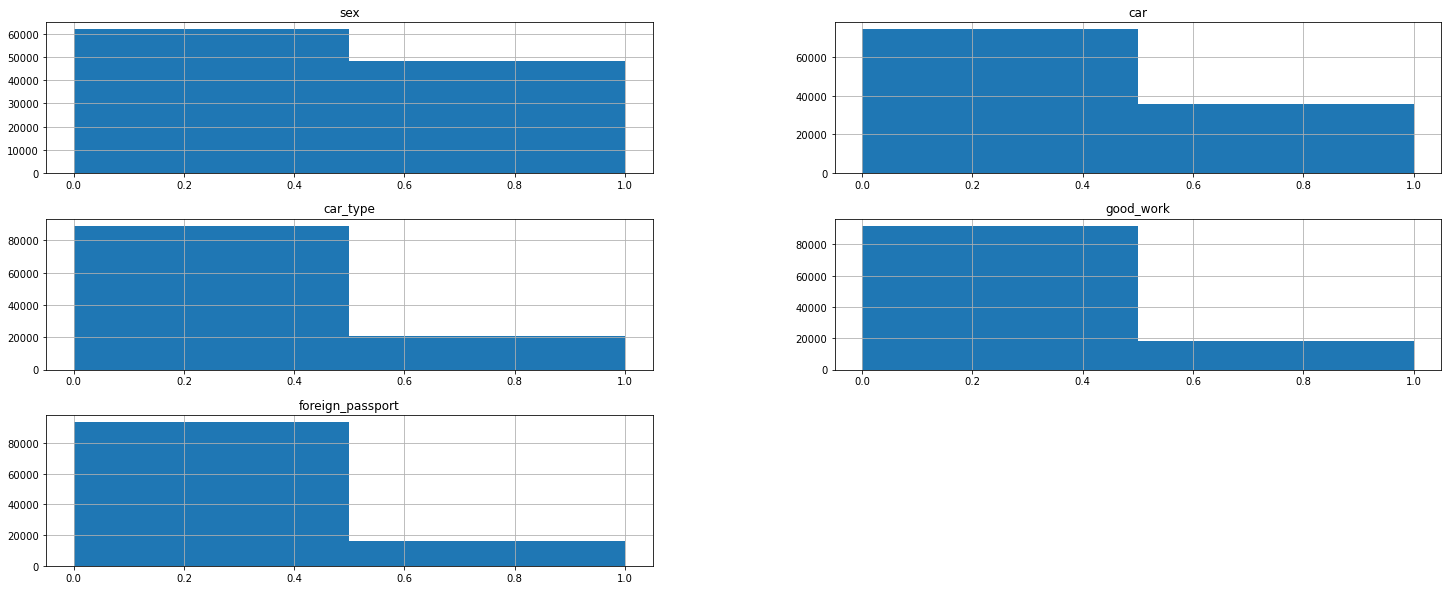

In [23]:
df[bin_cols.columns].hist(figsize=(25,10),bins=2)

<AxesSubplot:>

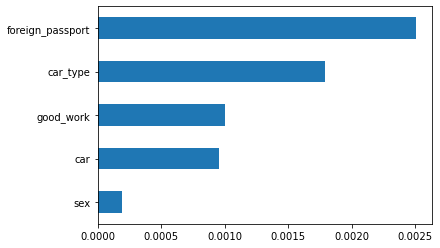

In [24]:
imp_cat = pd.Series(mutual_info_classif(df[df.test == 0][bin_cols.columns], df[df.test == 0]['default'],
                                        discrete_features=True), index=bin_cols.columns)
imp_cat.sort_values(inplace=True)
imp_cat.plot(kind='barh')

In [25]:
df[cat_cols.columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   education     110148 non-null  object
 1   home_address  110148 non-null  int64 
 2   work_address  110148 non-null  int64 
 3   sna           110148 non-null  int64 
 4   first_time    110148 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 4.2+ MB


In [26]:
df_dummies = pd.get_dummies(df[cat_cols.columns].astype('object'))
df_dummies

,education_ACD,education_GRD,education_PGR,education_SCH,education_UGR,home_address_1,home_address_2,home_address_3,work_address_1,work_address_2,work_address_3,sna_1,sna_2,sna_3,sna_4,first_time_1,first_time_2,first_time_3,first_time_4
0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0
2,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0
4,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110143,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0
110144,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
110145,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
110146,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0


In [27]:
dummy_cols = df_dummies.columns

In [28]:
df = pd.concat([df, df_dummies], axis=1)

In [29]:
df.columns

Index(['client_id', 'app_date', 'education', 'sex', 'age', 'car', 'car_type',
       'decline_app_cnt', 'good_work', 'score_bki', 'bki_request_cnt',
       'region_rating', 'home_address', 'work_address', 'income', 'sna',
       'first_time', 'foreign_passport', 'default', 'test', 'education_ACD',
       'education_GRD', 'education_PGR', 'education_SCH', 'education_UGR',
       'home_address_1', 'home_address_2', 'home_address_3', 'work_address_1',
       'work_address_2', 'work_address_3', 'sna_1', 'sna_2', 'sna_3', 'sna_4',
       'first_time_1', 'first_time_2', 'first_time_3', 'first_time_4'],
      dtype='object')

In [30]:
df.drop(columns=cat_cols, inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   sex               110148 non-null  int64  
 3   age               110148 non-null  float64
 4   car               110148 non-null  int64  
 5   car_type          110148 non-null  int64  
 6   decline_app_cnt   110148 non-null  float64
 7   good_work         110148 non-null  int64  
 8   score_bki         110148 non-null  float64
 9   bki_request_cnt   110148 non-null  float64
 10  region_rating     110148 non-null  float64
 11  income            110148 non-null  float64
 12  foreign_passport  110148 non-null  int64  
 13  default           110148 non-null  int64  
 14  test              110148 non-null  int64  
 15  education_ACD     110148 non-null  uint8  
 16  education_GRD     11

In [32]:
x = df[df.test == 0].drop(columns=['client_id','app_date','default'])
y = df[df.test == 0]['default']

In [33]:
x_pred = df[df.test == 1].drop(columns=['client_id','default','app_date'])

In [34]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=13)

In [35]:
model = LogisticRegression(random_state=13, max_iter=1000, solver='lbfgs')
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=13)

In [36]:
probs = model.predict_proba(x_test)
probs = probs[:, 1]

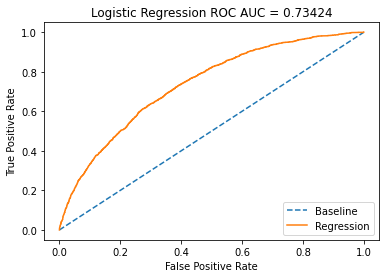

In [37]:
fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label='Regression')
plt.title('Logistic Regression ROC AUC = %0.5f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [38]:
y_pred = model.predict(x_test)

In [39]:
list(y_pred)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [40]:
pd.Series(y_pred).value_counts()

0    14649
1      111
dtype: int64

In [41]:
pd.Series(probs).describe()

count    14760.000000
mean         0.129118
std          0.099925
min          0.005121
25%          0.058276
50%          0.100560
75%          0.171163
max          0.943534
dtype: float64

In [42]:
confusion_matrix(y_test, y_pred)

array([[12856,    55],
       [ 1793,    56]])

In [43]:

penalty = ['l2']

In [44]:
C = np.logspace(0, 2, 20)
C

array([  1.        ,   1.27427499,   1.62377674,   2.06913808,
         2.6366509 ,   3.35981829,   4.2813324 ,   5.45559478,
         6.95192796,   8.8586679 ,  11.28837892,  14.38449888,
        18.32980711,  23.35721469,  29.76351442,  37.92690191,
        48.32930239,  61.58482111,  78.47599704, 100.        ])

In [45]:
hyperparameters = dict(C=C, penalty=penalty)

In [46]:
model = LogisticRegression(random_state=13, max_iter=1000, solver='lbfgs')
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)


In [47]:
best_model = clf.fit(x_train, y_train)

In [48]:
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

Лучшее Penalty: l2
Лучшее C: 1.2742749857031337


In [49]:
p = best_model.best_estimator_.get_params()['penalty']
c = best_model.best_estimator_.get_params()['C']

In [50]:
model = LogisticRegression(penalty=p,C=c, random_state=13, max_iter=1000, solver='lbfgs')

In [51]:
model.fit(x_train, y_train)

LogisticRegression(C=1.2742749857031337, max_iter=1000, random_state=13)

In [52]:
probs = model.predict_proba(x_test)
probs = probs[:, 1]

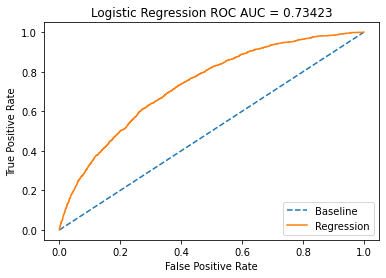

In [53]:
fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label='Regression')
plt.title('Logistic Regression ROC AUC = %0.5f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [54]:
y_pred = model.predict(x_test)

In [55]:
confusion_matrix(y_test, y_pred)

array([[12856,    55],
       [ 1793,    56]])

In [56]:
y_pred = model.predict(x_pred)
y_pred_proba = model.predict_proba(x_pred)

In [57]:
x_pred

,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,income,...,work_address_2,work_address_3,sna_1,sna_2,sna_3,sna_4,first_time_1,first_time_2,first_time_3,first_time_4
73799,1,-0.889859,1,1,-0.341893,0,-0.735587,0.438921,-0.516704,0.197961,...,1,0,1,0,0,0,0,0,0,1
73800,0,-0.021654,0,0,5.915180,0,0.800039,-0.002207,-0.516704,-0.793238,...,1,0,0,0,0,1,0,0,1,0
73801,1,0.933372,1,1,-0.341893,0,0.426908,-0.443335,-0.516704,-0.242572,...,1,0,1,0,0,0,0,0,1,0
73802,1,1.454295,0,0,-0.341893,0,-0.940432,-0.443335,-1.282058,-0.528918,...,1,0,1,0,0,0,0,0,1,0
73803,0,-0.108474,0,0,-0.341893,0,-1.167347,-0.884463,1.779355,1.739828,...,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110143,0,-0.195295,0,0,0.909522,0,0.319505,0.438921,-0.516704,-0.572972,...,0,1,0,0,0,1,1,0,0,0
110144,0,2.148860,1,1,-0.341893,0,-0.779436,0.438921,0.248649,3.501960,...,1,0,1,0,0,0,0,0,0,1
110145,1,-0.716218,0,0,2.160936,0,1.929901,-0.443335,-0.516704,0.418228,...,1,0,0,0,0,1,0,1,0,0
110146,0,-1.063501,0,0,0.909522,0,1.325890,-0.002207,1.779355,-0.242572,...,0,1,1,0,0,0,1,0,0,0


In [58]:
list(y_pred)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [59]:
y_pred_proba[:,1]

array([0.04126686, 0.31071814, 0.06912398, ..., 0.35092663, 0.15772523,
       0.27371648])

In [60]:
len(y_pred)

36349

In [62]:
submission_proba = test.client_id.to_frame()
submission_proba['default'] = y_pred_proba[:,1]
submission_proba

,client_id,default
0,74835,0.041267
1,17527,0.310718
2,75683,0.069124
3,26883,0.083871
4,28862,0.026755
...,...,...
36344,83775,0.310973
36345,106254,0.019694
36346,81852,0.350927
36347,1971,0.157725


In [ ]:
submission_proba.to_csv('submission.csv', index = False)